<a href="https://colab.research.google.com/github/mralamdari/NLP-Spam-Detector/blob/main/NLP_Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import feature_selection
from sklearn import ensemble, feature_extraction

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

--2022-05-07 08:11:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [application/x-httpd-php]
Saving to: ‘spambase.data.1’

spambase.data.1     100%[===================>] 686.47K  2.06MB/s    in 0.3s    

2022-05-07 08:11:08 (2.06 MB/s) - ‘spambase.data.1’ saved [702942/702942]



In [3]:
data = pd.read_csv('spambase.data')

In [4]:
data

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [5]:
data = np.array(data)

In [6]:
data.shape

(4600, 58)

In [7]:
np.random.shuffle(data)

In [8]:
x = data[:, :58]
y = data[:, -1]

In [9]:
y

array([1., 0., 0., ..., 1., 1., 1.])

In [10]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=32)

In [11]:
x_train.shape, x_test.shape

((3680, 58), (920, 58))

In [12]:
model = naive_bayes.MultinomialNB()

In [13]:
model.fit(x_train, y_train)

MultinomialNB()

In [14]:
pred = model.predict(x_test)

In [15]:
100 * sum(pred == y_test) / len(pred)

84.67391304347827

In [16]:
100*model.score(x_test, y_test)

84.67391304347827

In [17]:
model = ensemble.AdaBoostClassifier()

In [18]:
model.fit(x_train, y_train)

AdaBoostClassifier()

In [19]:
model.score(x_test, y_test)

1.0

#SMS Spam Detector

In [22]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/'
!kaggle datasets download -d uciml/sms-spam-collection-dataset

401 - Unauthorized


In [25]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [26]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [28]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [30]:
data.columns = ['labels', 'data']

In [31]:
data

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [32]:
data['binary_labels'] = data['labels'].map({'ham': 0, 'spam': 1})

In [34]:
y = data['binary_labels'].values

In [36]:
data[:10]

,labels,data,binary_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [37]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data['data'], y, test_size=0.33, random_state=32)

In [38]:
x_train.shape, x_test.shape

((3733,), (1839,))

In [39]:
tfidf = feature_extraction.text.TfidfVectorizer(decode_error='ignore')
X_train = tfidf.fit_transform(x_train)
X_test = tfidf.transform(x_test)

In [46]:
X_test.shape, X_train.shape

((1839, 7074), (3733, 7074))

In [47]:
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [48]:
model.score(X_test, y_test)

0.958673191952148

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [76]:
def visualize(label):
  words = ''
  selected_part = data[data['labels']==label]['data']
  for p in selected_part:
    msg = p.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

In [81]:
def visualize(label, counts=16):
  words = ''
  selected_part = data[data['labels']==label]['data']
  for p in selected_part:
    msg = p.lower()
    words += msg + ' '

  if counts == 1:
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

  plt.figure(figsize=(160, 160))
  fig, ax = plt.subplots(counts//4, counts//4)
  for i in range(counts//4):
    for j in range(counts//4):
      wordcloud = WordCloud(width=600, height=400).generate(words)
      ax[i, j].imshow(wordcloud)
  plt.show()
      

<Figure size 11520x11520 with 0 Axes>

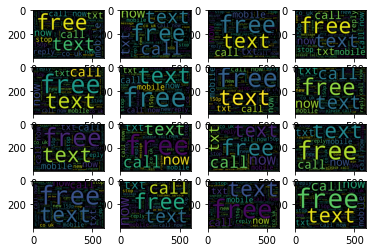

In [77]:
visualize('spam')

<Figure size 11520x11520 with 0 Axes>

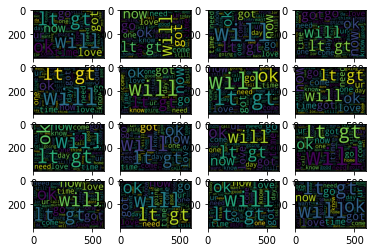

In [78]:
visualize('ham')

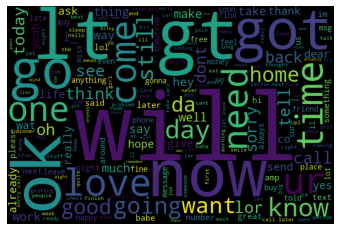

<Figure size 11520x11520 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [82]:
visualize('ham', 1)

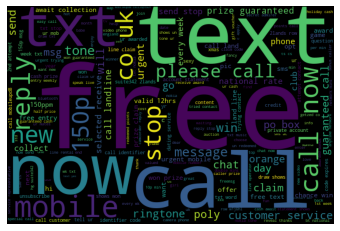

<Figure size 11520x11520 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [84]:
visualize('spam', 1)